# Imports

In [1]:
#Imports
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import scipy
import datetime
import sys
import networkx as nx
import misc
import math
import random
import time
import SmallBucket
import BigBucket
import RandomWarmUp1
import RandomWarmUp2
import StaticDynamic
import DcOrient
import DcOrientRandomSimple
import DcSimple
import StaticSimple
import BigBucketSimple
import SmallBucketSimple
import StaticGreedy
import StaticRandom

# Data Generation

In [5]:
G = nx.Graph()
G.add_nodes_from({1,2,3,4,5,6})
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(1,6)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)

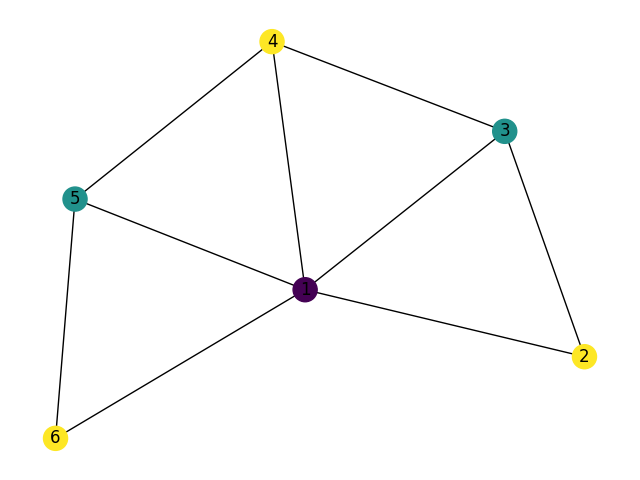

In [6]:
misc.draw(G, nx.coloring.greedy_color(G))

In [81]:
G = misc.createRandomGraph(size=200, variation=0, density=0.5306)
misc.graphInfo(G)

avg = misc.getAverageDegree(G)
variance = 0
degreeTuples = list(G.degree(list(G.nodes())))

for tuple in degreeTuples:
    variance += abs(avg - tuple[1])

variance = float(variance) / G.number_of_nodes()

variance

Nodes: 200
Edges: 10558
Density: 0.5305527638190954
Max Degree: 121
Average Degree: 105.58
Static Coloring uses 33 colors at the end


5.580000000000002

In [65]:
# EITHER
updates = misc.extractUpdates(G, 'random')

Ge = nx.Graph()
Ge.add_nodes_from(list(G.nodes()))

In [82]:
# OR
updates = misc.extractStream(G, 100000, addProb=0.5, ordering='random')

Ge = G.copy()

In [4]:
# Ge = nx.Graph()
# Ge.add_nodes_from(list(G.nodes()))

# Saving and Loading Graph Data

In [83]:
# Always define a name
name = 'StreamRandom'

In [84]:
# Create graph data
nodes = list(Ge.nodes())
edges = list(Ge.edges())
updateEdges = list(update[0] for update in updates)
updateTypes = list(update[1] for update in updates)

ge = Ge.copy()
oldColoring = nx.coloring.greedy_color(ge)
newColoring = dict({})
staticColors = []
staticRecolors = []
for update in updates:
    if update[1]:
        ge.add_edge(update[0][0], update[0][1])
    else:
        ge.remove_edge(update[0][0], update[0][1])
    newColoring = nx.coloring.greedy_color(ge)
    staticColors.append(misc.numberOfColors(newColoring))
    staticRecolors.append(misc.numberOfRecolors(oldColoring, newColoring))
    oldColoring = newColoring

gd = misc.GraphData(name, nodes, edges, updateEdges, updateTypes, staticColors, staticRecolors)
totStaticColors = gd.colorSum
totStaticRecolors = gd.recolorSum

In [85]:
# Save graph data
misc.saveGraphData(gd)

In [ ]:
# Load graph data
gd = misc.loadGraphData(name)

Ge = gd.G.copy()

updates = gd.updates
staticColors = gd.staticColors
staticRecolors = gd.staticRecolors
totStaticColors = gd.colorSum
totStaticRecolors = gd.recolorSum

# Get final state of graph in local memory as well
G = gd.G.copy()
for update in updates:
    if update[1]:
        G.add_edge(update[0][0], update[0][1])
    else:
        G.remove_edge(update[0][0], update[0][1])

# Algorithm Preparation

In [6]:
experimentList = []

experimentList.append([RandomWarmUp1.WarmUp1Algo(Ge, maxDegreeBound=None), 'Random Warm-Up 1'])
experimentList.append([RandomWarmUp2.WarmUp2Algo(Ge, maxDegreeBound=None), 'Random Warm-Up 2'])

d = 10
experimentList.append([SmallBucket.SmallBucketAlgo(d, Ge), 'Small-Bucket algorithm (d = '+str(d)+')', 10])

d = 10
experimentList.append([BigBucket.BigBucketAlgo(d, Ge), 'Big-Bucket algorithm (d = '+str(d)+')', 10])

l = 10
experimentList.append([StaticDynamic.StaticDynamicAlgo(Ge, l, dynamicReset=False), 'Static-Dynamic algorithm (l = '+str(l)+')'])

l = 50
experimentList.append([StaticDynamic.StaticDynamicAlgo(Ge, l, dynamicReset=False), 'Static-Dynamic algorithm (l = '+str(l)+')'])

l = 5
experimentList.append([StaticSimple.StaticSimpleAlgo(Ge, l=l), 'Static-Simple (l = '+str(l)+')'])

l = 50
experimentList.append([StaticSimple.StaticSimpleAlgo(Ge, l=l), 'Static-Simple (l = '+str(l)+')'])

p=0.8
experimentList.append([DcOrientRandomSimple.DcOrientRandomSimpleAlgo(Ge, p=p), 'DC-Orient-Random-Simple (p = '+str(p)+')'])

p=0.8
experimentList.append([DcSimple.DcSimpleAlgo(Ge, p=p), 'DC-Simple (p = '+str(p)+')'])

experimentList.append([DcOrient.DcOrientAlgo(Ge), 'DC-Orient'])


In [8]:
experimentList = []

experimentList.append([RandomWarmUp1.WarmUp1Algo(Ge, maxDegreeBound=None), 'Random Warm-Up 1'])
d=10
p=1
experimentList.append([BigBucketSimple.BigBucketSimpleAlgo(d, p, Ge), 'Big-Bucket Simple algorithm (d = '+str(d)+', p = '+str(p)+')'])
experimentList.append([BigBucket.BigBucketAlgo(d, Ge), 'Big-Bucket algorithm (d = '+str(d)+')', 10])


experimentList.append([SmallBucketSimple.SmallBucketSimpleAlgo(d, p, Ge), 'Small-Bucket Simple algorithm (d = '+str(d)+', p = '+str(p)+')'])
experimentList.append([SmallBucket.SmallBucketAlgo(d, Ge), 'Small-Bucket algorithm (d = '+str(d)+')', 10])


In [10]:
experimentList = []

p=0.8
experimentList.append([StaticRandom.StaticRandomAlgo(Ge, p=p), 'Static Random (p = '+str(p)+')'])
experimentList.append([DcSimple.DcSimpleAlgo(Ge, p=p), 'DC-Simple (p = '+str(p)+')'])

l = 100
experimentList.append([StaticSimple.StaticSimpleAlgo(Ge, l=l), 'Static-Simple (l = '+str(l)+')'])

d=10
experimentList.append([SmallBucket.SmallBucketAlgo(d, Ge), 'Small-Bucket algorithm (d = '+str(d)+')', 10])
experimentList.append([DcOrient.DcOrientAlgo(Ge), 'DC-Orient'])
experimentList.append([StaticGreedy.StaticGreedyAlgo(Ge), 'Static Greedy Coloring'])

# Experimenting

In [11]:
# CSV Writer
loadingBar = True
f = open('experiment_output.csv', 'w', newline='')
writer = csv.writer(f)

print('Graph used in the experiment:')
misc.graphInfo(G)

row = [str(G.number_of_nodes()) + ' Nodes; ' + str(G.number_of_edges()) + ' Edges; C = ' + str(misc.numberOfColors(nx.coloring.greedy_color(G))),'Average nr. of Recolors', 'Total nr. of Colors', 'Time Taken (s)']
writer.writerow(row)

for experiment in experimentList:

    row = [str(experiment[1])]

    if len(experiment) == 3:
        random.seed(experiment[2])
    else:
        random.seed()

    print("")
    print("------------------------------------------------------------------")
    print(str(experiment[1]) + ":")
    iterator = misc.UpdateIterator(experiment[0], updates)

    recolors = 0
    timer = time.perf_counter()

    totalUpdates = len(updates)
    done = 0
    barLength = 64

    if loadingBar:
        #line to be overwritten
        print("")

    while True:
        
        if loadingBar:
            #overwrite previously printed line
            percentageDone = int(done/totalUpdates*barLength)
            b = ("[" + percentageDone * "+" + (barLength - percentageDone) * "-" + "]")
            sys.stdout.write('\r'+b)
            sys.stdout.flush()

        if not misc.verifyColoring(iterator.algo.G, iterator.algo.getColoring()):
            raise ValueError('The coloring produced is incorrect')
        c1 = iterator.algo.getColoring()
        if iterator.runUpdate(1):
            c2 = iterator.algo.getColoring()
            recolors += misc.numberOfRecolors(c1, c2)
            done += 1
        else:
            # Verify coloring one last time before ending this experiment
            if not misc.verifyColoring(iterator.algo.G, iterator.algo.getColoring()):
                raise ValueError('The coloring produced is incorrect')
            #print("all updates finished")
            break

    timer = time.perf_counter() - timer

    if loadingBar:
        #overwrite previously printed line
        b = ("")
        sys.stdout.write('\r'+b)
        sys.stdout.flush()

    avgColors = float(recolors)/len(updates)
    b = "Average number of recolors per update: " + str(avgColors)
    b = b + (barLength + 2 - len(b)) * " "
    print(b)
    row.append(str(round(avgColors, 2)))
    totColors = misc.numberOfColors(iterator.algo.getColoring())
    print("Total number of colors used at the end: " + str(totColors))
    row.append(str(totColors))
    print("Time taken : " + str(timer) + " seconds")
    row.append(str(round(timer, 3)))
    print("Total time spent on accessing neighbors : " + str(iterator.elemCounter))
    #print("Average time spent on accessing neighbors : " + str(iterator.avgElemCounter))
    print("------------------------------------------------------------------")
    writer.writerow(row)

print("End of experiment list reached")
f.close()


Graph used in the experiment:
Nodes: 300
Edges: 22425
Density: 0.5
Max Degree: 247
Average Degree: 149.5
Static Coloring uses 128 colors

------------------------------------------------------------------
Static Random (p = 0.8):

Average number of recolors per update: 1.2792865105908584         
Total number of colors used at the end: 128
Time taken : 119.80042240000012 seconds
Total time spent on accessing neighbors : 0.2528760999807673
------------------------------------------------------------------

------------------------------------------------------------------
DC-Simple (p = 0.8):

Average number of recolors per update: 1.0896767001114827         
Total number of colors used at the end: 128
Time taken : 156.04378510000015 seconds
Total time spent on accessing neighbors : 0
------------------------------------------------------------------

------------------------------------------------------------------
Static-Simple (l = 100):

Average number of recolors per update: 0.092

# Results